<a href="https://colab.research.google.com/github/Sebastianpastrana/Act4ExtraccionDeCaracteristicas/blob/main/Act4Extracci%C3%B3ndeCaracteristicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling;

In [8]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [9]:
#cargar archivo csv desde equipo
from google.colab import files
files.upload();

Saving microretailer_mit_lift_lab.xlsx to microretailer_mit_lift_lab (1).xlsx


In [ ]:
#Carga desde un archivo .csv sin indice
dataf= pd.read_excel("microretailer_mit_lift_lab.xlsx")
dataf

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Obtenemos informacion del dataframe
dataf.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [11]:
pd.options.display.max_columns=None
dataf.head(5)

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,97_number_of_customers_in_store,268_number_fridges,184_store_devices,104_how_many_shelves_does_the_micro_retailer_have,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,233_date_establishment,2_current_permanent_employees,4_number_permanent_employees_last_year,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,155_sales_registers_used_for,103_number_own_fridges,19_tax_id,145_number_direct_competitors,310_burnout,24_burnout,186_internet_connection,210_sales_channels,189_payment_methods,28_prefered_payment_method,31_different_prices_payment_method,269_cash_discount,270_card_extra_charge,271_card_fee,272_card_days_receive_money,273_platform_extra_charge,274_platform_fee,275_platform_days_receive_money,30_payment_methods_large_purchases,214_customer_relationship_tools,33_credit_to_customers,276_expected_days_informal_credit,35_interest_rate,36_credit_default_rate,38_average_margin_profits,193_sales_planning_tools,227_agreement_ecommerce_platforms,60_services,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,77_delivery_timeslots,79_delivery_vehicle,64_comission_services,66_percentaje_services_income,69_why_not_services,311_topups,312_payment_of_utilities,313_home_deliveries,314_reception_delivery_packages,42_willingness_share_inventory_data_suppliers,44_willingness_inventory_management_suppliers,45_willingness_reorder_suppliers,46_willingness_reorder_suppliers_variety,47_willingness_reorder_suppliers_lower_prices,43_willingness_share_sales_data_suppliers,58_willingness_share_sales_data_mse,59_willingness_share_sales_data_mse_better_prices,172_supplier_frequency,185_place_orders_suppliers,53_special_conditions_suppliers,278_credit_interest,192_procurement_planning_tools,277_payment_method_suppliers,56_procurement_changes_pandemic,279_changes_procurement_pandemic,157_frequency_organize_shelves,158_charact_organize_products_on_shelves,161_actions_stockouts,162_inventory_extra_space,163_number_high_perishable_products,249_technology_training,250_technology_investment_operations,251_technology_investment_customers,254_technology_roadmap,260_technology_scalable,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,yes,no,no,2,0.0,POS system (i.e. computer + bar code scanner +...,4,NaN,yes,yes,2021-04-12,2.0,2.0,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,NaN,NaN,yes,3.0,no,NaN,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Redes sociales,no,NaN,NaN,NaN,NaN,Software especializado,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes...",Solicitar tiempo al cliente para conseguir el ...,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y 

In [12]:
#Seleccionamos las columnas a tratar
filtro=dataf.iloc[ : , [1,3,9,10,11,12,15,17,20,23,24,25,26,27,32,34,35,36,86,87]]
filtro

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,157_frequency_organize_shelves,158_charact_organize_products_on_shelves
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,NaN,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes..."
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),NaN,2012-08-12,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,no,yes,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,"Categoría (e.g. limpieza, aseo personal, comes..."
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",NaN,2022-08-12,No cambió,No cambió,yes,En Excel,Software especializado + computadora,no,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes..."
3,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,NaN,2008-11-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,no,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes..."
4,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,Smartphone,NaN,2007-10-12,No cambió,No cambió,yes,En papel,En papel,no,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Mensualmente,Venta cruzada (e.g. cereal + leche)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),no,no,no,"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,"November 3, 2022",Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,"November 3, 2022",Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#Obtenemos info del filtro
filtro.dtypes
#Obtenemos que todas las columnas que seleccionamos son objetos

_title                                                   object
_updated_by                                              object
232_type_of_store                                        object
108_does_the_micro_retailer_has_a_barred_window_         object
99_does_the_micro_retailer_exhibits_products_outside_    object
102_does_the_micro_retailer_sells_fresh_products_        object
184_store_devices                                        object
pictures_of_shelves_if_possible                          object
233_date_establishment                                   object
5_change_store_space_last_year                           object
6_change_employees_average_salary_last_year              object
20_reviews_finances_monthly                              object
49_inventory_records                                     object
18_sales_records                                         object
310_burnout                                              object
186_internet_connection                 

In [14]:
#Contamos los valores nulos
valoresnulos=dataf.isnull().sum()
valoresnulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [15]:
#Hacemos una copia del dataframe
data3=dataf.copy()

In [16]:
#Sustituimos los valores nulos por la leyenda 'Sin Registro
data3["234_willingness_participate_workshop"]=data3["234_willingness_participate_workshop"].fillna("Sin registro")
data3["318_shopkeeper_name"]=data3["318_shopkeeper_name"].fillna("Sin registro")
data3["319_shopkeepers_last_name"]=data3["319_shopkeepers_last_name"].fillna("Sin registro")
data3["236_whatsapp"]=data3["236_whatsapp"].fillna("Sin registro")
data3["235_email"]=data3["235_email"].fillna("Sin registro")

In [17]:
#Corroboramos que ya no tenga valores nulos
valoresnuloslimpios=data3.isnull().sum()
valoresnuloslimpios

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

In [18]:
#Imprimimos el dataframe
filtro

,_title,_updated_by,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,233_date_establishment,5_change_store_space_last_year,6_change_employees_average_salary_last_year,20_reviews_finances_monthly,49_inventory_records,18_sales_records,310_burnout,186_internet_connection,210_sales_channels,189_payment_methods,157_frequency_organize_shelves,158_charact_organize_products_on_shelves
0,"November 12, 2022",Salomon Abdala Perez,Tailor,yes,no,no,POS system (i.e. computer + bar code scanner +...,NaN,2021-04-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,no,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",Semestralmente,"Categoría (e.g. limpieza, aseo personal, comes..."
1,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,yes,yes,Dataphone (i.e. card payments),NaN,2012-08-12,Aumentó 15%,No cambió,yes,No lo hago,No lo hago,no,yes,WhatsApp,"Efectivo,Transferencia interbancaria",NaN,"Categoría (e.g. limpieza, aseo personal, comes..."
2,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,"Dataphone (i.e. card payments),POS system (i.e...",NaN,2022-08-12,No cambió,No cambió,yes,En Excel,Software especializado + computadora,no,yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes..."
3,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),no,no,no,POS system (i.e. computer + bar code scanner +...,NaN,2008-11-12,No cambió,No cambió,yes,Software especializado + computadora,Software especializado + computadora,no,yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Semanalmente,"Categoría (e.g. limpieza, aseo personal, comes..."
4,"November 12, 2022",Salomon Abdala Perez,Grocery store (aka. nanostore),yes,no,no,Smartphone,NaN,2007-10-12,No cambió,No cambió,yes,En papel,En papel,no,yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",Mensualmente,Venta cruzada (e.g. cereal + leche)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,"November 3, 2022",Emilio Garza,Grocery store (aka. nanostore),no,no,no,"Analog cash register,Smartphone",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,"November 3, 2022",Emilio Garza,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169,"November 3, 2022",Francisco Adán,Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Filtro para obtener variables cuantitativas
Cuantitativas=data3.iloc[ : , [13]]
Cuantitativas

,97_number_of_customers_in_store
0,2
1,0
2,0
3,0
4,0
...,...
166,1
167,1
168,3
169,0


In [20]:
#Filtro para obtener variables cualitativas
Cualitativas=data3.iloc[ : , [0,2,3,4,5,7,8,11,12,15,17,18,19]]
Cualitativas

,_record_id,_server_updated_at,_updated_by,_geometry,_latitude,228_store_name,229_store_picture,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial
0,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,Eugene’s Compostura,1 Photo,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes
1,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,Frutas y verduras Angy,1 Photo,yes,yes,Dataphone (i.e. card payments),NaN,yes,yes
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,Libélula,1 Photo,no,no,"Dataphone (i.e. card payments),POS system (i.e...",NaN,yes,yes
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,Quality fix,1 Photo,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,Artesanías Los Pinos,1 Photo,no,no,Smartphone,NaN,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,July Store,1 Photo,no,no,"Analog cash register,Smartphone",NaN,no,yes
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,Miscelánea rubí,1 Photo,no,no,"Analog cash register,Smartphone",NaN,no,yes
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,La fonda,1 Photo,no,yes,Smartphone,NaN,no,yes
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,no,yes,Analog cash register,NaN,no,yes


In [21]:
#definimos limites
y=Cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 97_number_of_customers_in_store    6.591777
dtype: float64
Limite inferior permitido 97_number_of_customers_in_store   -3.808151
dtype: float64


In [22]:
#Eliminamos datos atipicos
Datos_sin_Outliers= Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Datos_sin_Outliers

,97_number_of_customers_in_store
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
166,1.0
167,1.0
168,3.0
169,0.0


In [23]:
#Contamos valores nulos de los datos sin outliners
valores_nulos=Datos_sin_Outliers.isnull().sum()
valores_nulos

97_number_of_customers_in_store    4
dtype: int64

In [24]:
##Contamos valores nulos de los datos sin outliners
data_clean=Datos_sin_Outliers.copy()
data_clean=data_clean.fillna(round(Datos_sin_Outliers.mean(),1))
data_clean

,97_number_of_customers_in_store
0,2.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
166,1.0
167,1.0
168,3.0
169,0.0


In [25]:
#Corroboramos que ya no tenga valores nulos
valores_nulos=data_clean.isnull().sum()
valores_nulos

97_number_of_customers_in_store    0
dtype: int64

In [35]:
Dataframe_final = pd.concat([Cualitativas, data_clean], axis=1)
Dataframe_final

,_record_id,_server_updated_at,_updated_by,_geometry,_latitude,228_store_name,229_store_picture,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,pictures_of_shelves_if_possible,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,97_number_of_customers_in_store
0,dff2998e-af74-4de6-8efd-488aca24e67b,2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,Eugene’s Compostura,1 Photo,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes,2.0
1,c596412f-4fc2-4983-acba-d9565859e42f,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,Frutas y verduras Angy,1 Photo,yes,yes,Dataphone (i.e. card payments),NaN,yes,yes,0.0
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,Libélula,1 Photo,no,no,"Dataphone (i.e. card payments),POS system (i.e...",NaN,yes,yes,0.0
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,Quality fix,1 Photo,no,no,POS system (i.e. computer + bar code scanner +...,NaN,yes,yes,0.0
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,Artesanías Los Pinos,1 Photo,no,no,Smartphone,NaN,yes,yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,July Store,1 Photo,no,no,"Analog cash register,Smartphone",NaN,no,yes,1.0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,Miscelánea rubí,1 Photo,no,no,"Analog cash register,Smartphone",NaN,no,yes,1.0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,La fonda,1 Photo,no,yes,Smartphone,NaN,no,yes,3.0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,no,yes,Analog cash register,NaN,no,yes,0.0


<Axes: ylabel='frequency'>

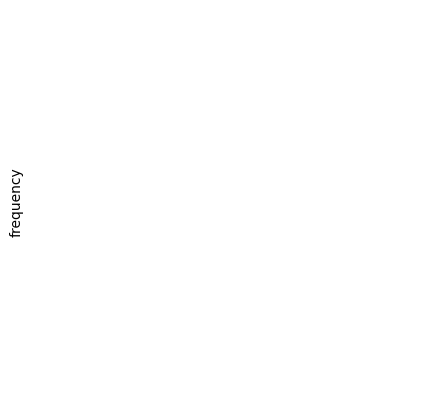

In [36]:
table= freq_tbl(Dataframe_final['_record_id'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('_record_id')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

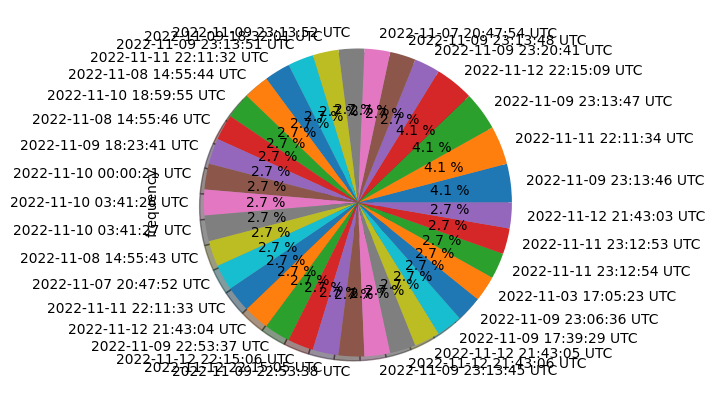

In [37]:
table= freq_tbl(Dataframe_final['_server_updated_at'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('_server_updated_at')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

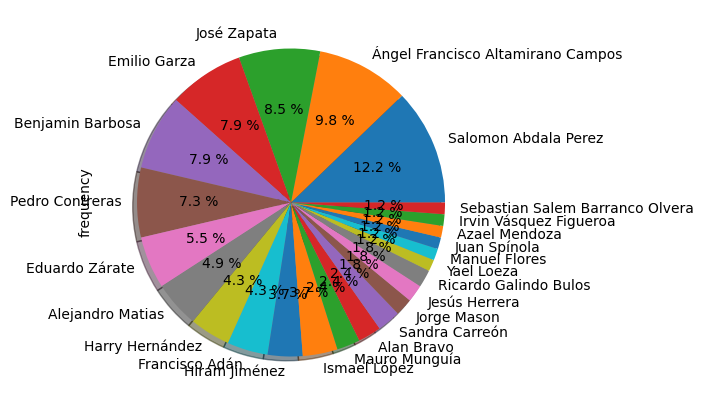

In [39]:

table= freq_tbl(Dataframe_final['_updated_by'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('_updated_by')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

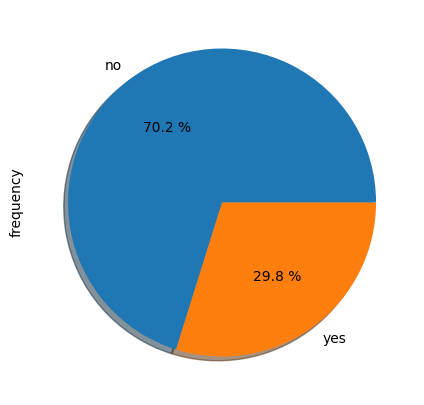

In [ ]:
table= freq_tbl(Dataframe_final['99_does_the_micro_retailer_exhibits_products_outside_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

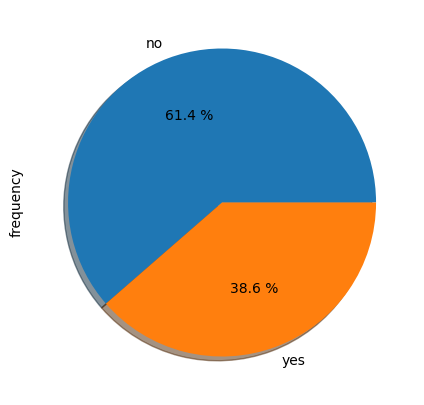

In [ ]:
table= freq_tbl(Dataframe_final['102_does_the_micro_retailer_sells_fresh_products_'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('102_does_the_micro_retailer_sells_fresh_products_')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

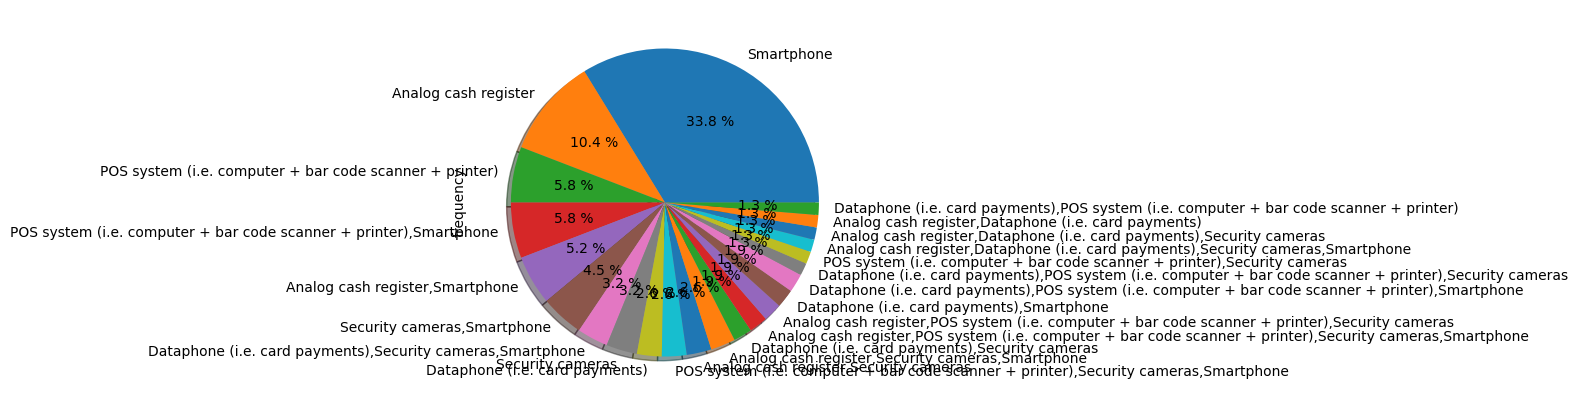

In [ ]:

table= freq_tbl(Dataframe_final['184_store_devices'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('184_store_devices')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

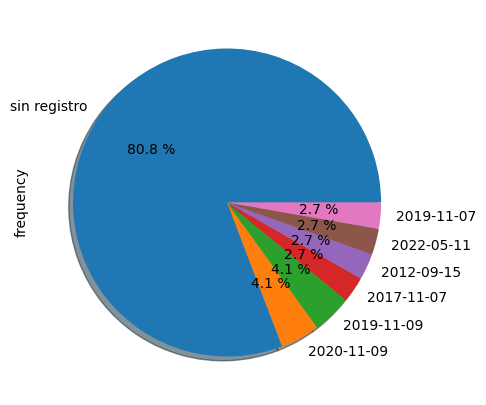

In [ ]:
table= freq_tbl(Dataframe_final['233_date_establishment'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('233_date_establishment')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

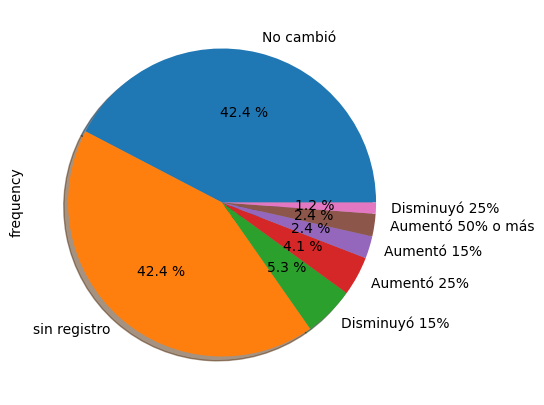

In [ ]:
table= freq_tbl(Dataframe_final['5_change_store_space_last_year'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('5_change_store_space_last_year')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")


<Axes: ylabel='frequency'>

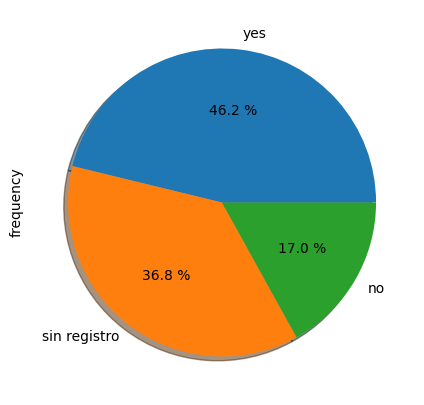

In [ ]:
table= freq_tbl(Dataframe_final['20_reviews_finances_monthly'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('20_reviews_finances_monthly')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

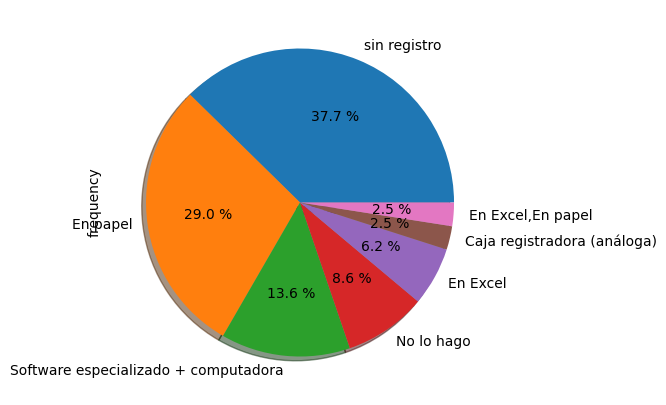

In [ ]:
table= freq_tbl(Dataframe_final['18_sales_records'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('18_sales_records')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

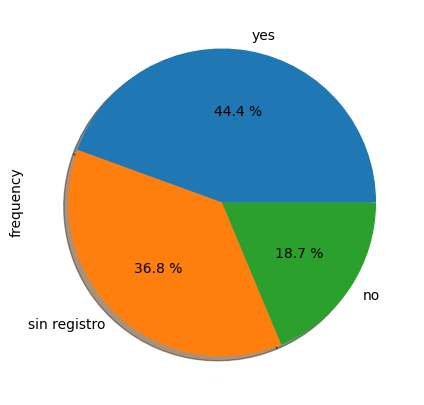

In [ ]:
table= freq_tbl(Dataframe_final['186_internet_connection'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('186_internet_connection')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

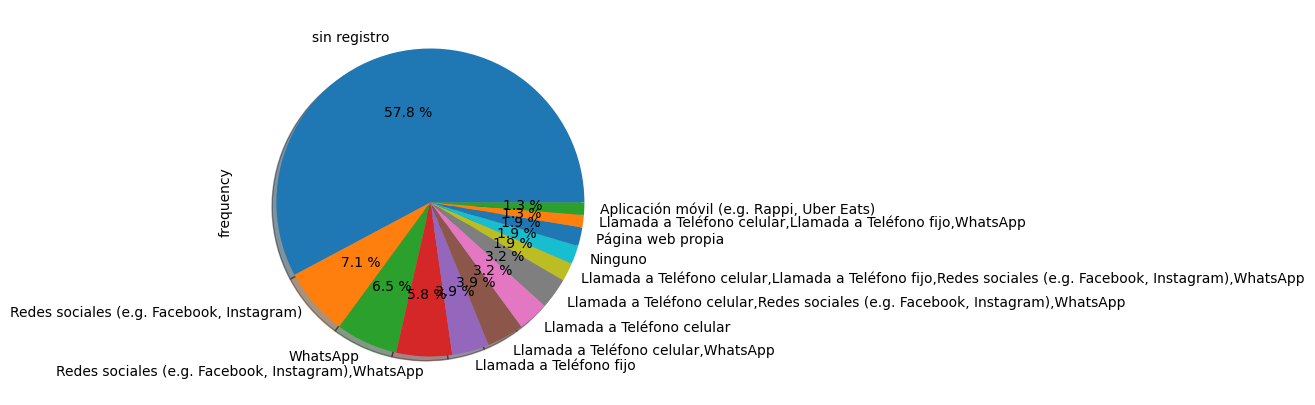

In [ ]:
table= freq_tbl(Dataframe_final['210_sales_channels'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('210_sales_channels')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

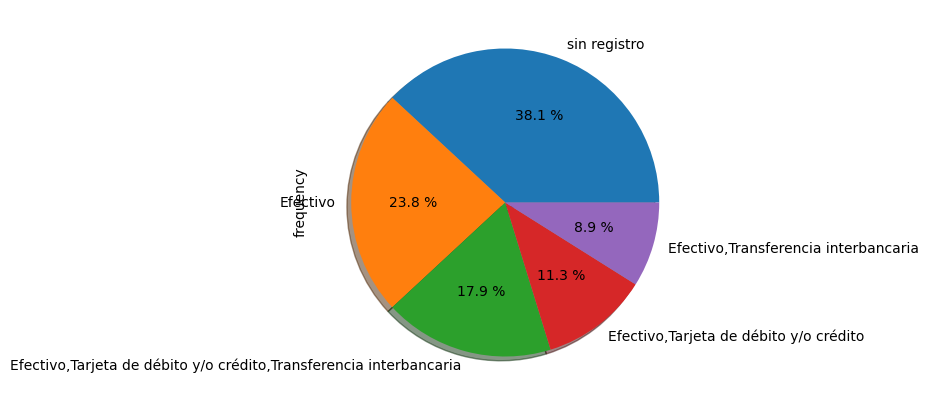

In [ ]:
table= freq_tbl(Dataframe_final['189_payment_methods'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('189_payment_methods')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

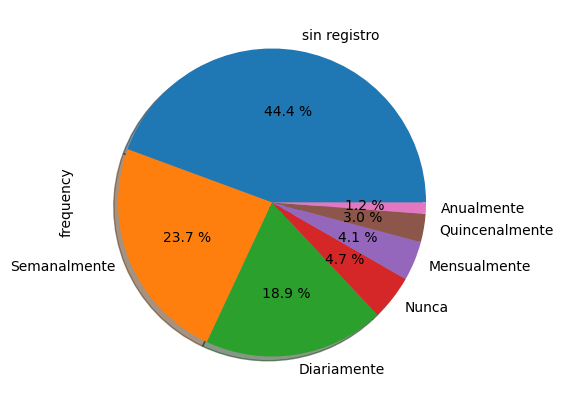

In [ ]:
table= freq_tbl(Dataframe_final['157_frequency_organize_shelves'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('157_frequency_organize_shelves')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")

<Axes: ylabel='frequency'>

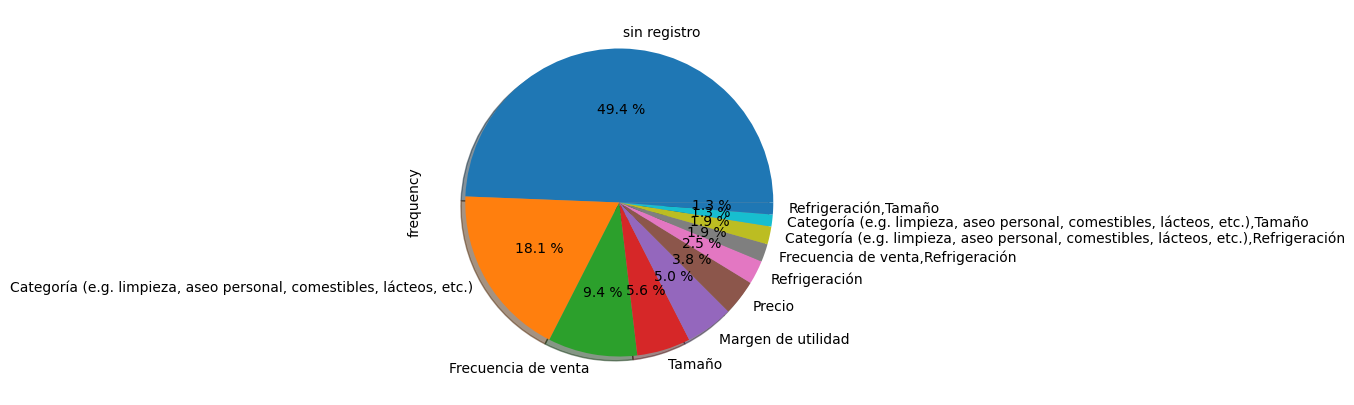

In [ ]:
table= freq_tbl(Dataframe_final['158_charact_organize_products_on_shelves'])
Filtro= table[table['frequency']>1]
Filtro_index= Filtro.set_index('158_charact_organize_products_on_shelves')
Filtro_index["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%")
